# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

In [2]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6994,"Hyundai Verna CRDi SX,2007,135000,119000,Diese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6995,Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6996,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [2]:
train = train.drop(index=train.loc[train['selling_price'].isna()].index)
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6993,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6996,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [3]:
Xtrain = train.drop(columns=['selling_price'])
ytrain = train['selling_price']

Xtest = test.drop(columns=['selling_price'])
ytest = test['selling_price']

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [5]:
Xtrain['mileage'].info()

<class 'pandas.core.series.Series'>
Index: 6699 entries, 0 to 6997
Series name: mileage
Non-Null Count  Dtype 
--------------  ----- 
6497 non-null   object
dtypes: object(1)
memory usage: 104.7+ KB


In [6]:
Xtrain['engine'].info()

<class 'pandas.core.series.Series'>
Index: 6699 entries, 0 to 6997
Series name: engine
Non-Null Count  Dtype 
--------------  ----- 
6497 non-null   object
dtypes: object(1)
memory usage: 104.7+ KB


In [7]:
Xtrain['max_power'].info()

<class 'pandas.core.series.Series'>
Index: 6699 entries, 0 to 6997
Series name: max_power
Non-Null Count  Dtype 
--------------  ----- 
6503 non-null   object
dtypes: object(1)
memory usage: 104.7+ KB


In [8]:
sum(Xtrain['mileage'].isna())

202

In [9]:
sum(Xtrain['engine'].isna())

202

In [10]:
Xtrain['engine']

0       1248 CC
1       1498 CC
2       1396 CC
4       1197 CC
6        796 CC
         ...   
6992     998 CC
6993    1197 CC
6995    1248 CC
6996    1396 CC
6997    1396 CC
Name: engine, Length: 6699, dtype: object

In [22]:
sum(Xtrain['max_power'].isna())

196

In [31]:
Xtrain['max_power']

0           74 bhp
1       103.52 bhp
2           90 bhp
4        81.86 bhp
6           37 bhp
           ...    
6992      67.1 bhp
6993     82.85 bhp
6995      73.9 bhp
6996        70 bhp
6997        70 bhp
Name: max_power, Length: 6699, dtype: object

In [25]:
Xtrain['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        23.0 kmpl
4       20.14 kmpl
6        16.1 kmpl
           ...    
6992     18.9 kmpl
6993     18.5 kmpl
6995     19.3 kmpl
6996    23.57 kmpl
6997    23.57 kmpl
Name: mileage, Length: 6699, dtype: object

In [15]:
Xtrain[Xtrain['engine'].isna()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007.0,80000.0,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003.0,50000.0,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003.0,70000.0,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015.0,78000.0,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010.0,120000.0,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6763,Toyota Qualis Fleet A3,2000.0,100000.0,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6888,Hyundai Santro LS zipPlus,2000.0,50000.0,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6900,Hyundai Santro Xing XS eRLX Euro III,2006.0,80000.0,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6948,Ford Figo Aspire Facelift,2017.0,165000.0,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [4]:
Xtrain['mileage'] = Xtrain['mileage'].apply(lambda x: float(str(x).split(' ')[0]))
Xtrain['engine'] = Xtrain['engine'].apply(lambda x: float(str(x).split(' ')[0]))
Xtrain['max_power'] = Xtrain['max_power'].apply(lambda x: float(str(x).split(' ')[0]))

Xtrain[['mileage', 'engine', 'max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,23.00,1396.0,90.00
4,20.14,1197.0,81.86
6,16.10,796.0,37.00
...,...,...,...
6992,18.90,998.0,67.10
6993,18.50,1197.0,82.85
6995,19.30,1248.0,73.90
6996,23.57,1396.0,70.00


In [5]:
Xtest['mileage'] = Xtest['mileage'].apply(lambda x: float(str(x).split(' ')[0]))
Xtest['engine'] = Xtest['engine'].apply(lambda x: float(str(x).split(' ')[0]))
Xtest['max_power'] = Xtest['max_power'].apply(lambda x: float(str(x).split(' ')[0]))

Xtest[['mileage', 'engine', 'max_power']]

,mileage,engine,max_power
0,14.00,2498.0,112.00
1,21.50,1497.0,108.50
2,12.90,1799.0,130.00
3,25.10,1498.0,98.60
4,16.50,1172.0,65.00
...,...,...,...
995,19.81,1086.0,68.05
996,18.60,1197.0,81.83
997,23.00,1396.0,90.00
998,20.36,1197.0,78.90


Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [6]:
num_cols = ['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']
Xtrain = Xtrain[num_cols]
Xtest = Xtest[num_cols]


Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [7]:
col_with_nan = ['mileage', 'engine', 'max_power']
for col in col_with_nan:
    mean = Xtrain[col].mean()
    Xtrain.loc[Xtrain[col].isna(), col] = mean
    Xtest.loc[Xtest[col].isna(), col] = mean

sum(Xtrain['mileage'].isna())

0

In [46]:
sum(Xtrain['engine'].isna())

0

In [47]:
sum(Xtrain['max_power'].isna())

0

In [48]:
sum(Xtrain['year'].isna())

0

In [49]:
sum(Xtrain['km_driven'].isna())

0

In [30]:
sum(Xtrain['seats'].isna())

202

In [50]:
Xtrain['seats'].value_counts(dropna=False)

seats
5.0     5122
7.0      937
NaN      202
8.0      201
4.0      103
9.0       67
6.0       54
10.0      10
2.0        2
14.0       1
Name: count, dtype: int64

In [8]:
median = Xtrain['seats'].median()
Xtrain.loc[Xtrain['seats'].isna(), 'seats'] = median
sum(Xtrain['seats'].isna())

0

In [9]:
Xtest.loc[Xtest['seats'].isna(), 'seats'] = median

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred = lr.predict(Xtest)
print(f'r2 score={r2_score(ytest, pred)}')

r2 score=0.6481957240589246


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)

pred_rf = rf.predict(Xtest)

print(f'r2 score rf={r2_score(ytest, pred_rf)}')

r2 score rf=0.9624391846265153


Какая модель получилась лучше?

In [ ]:
# Лучше получилась модель RandomForestRegressor r2 = 0.96, у LinearRegression 0.65

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(100, 1000, 100)),
    'max_depth': list(range(2, 15, 1)),
    # 'max_features': list(range(1, 11, 1)),
    # 'min_samples_leaf': list(range(1, 11, 1)),
    # 'min_samples_split': list(range(1, 11, 1)),
}
rf_g = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(
   estimator=rf_g,
   param_grid=param_grid,
   scoring='r2',
   cv=3,
   n_jobs=-1,
)

grid_search_rf.fit(Xtrain, ytrain)

print(grid_search_rf.best_params_)

print(grid_search_rf.best_score_)

{'max_depth': 14, 'n_estimators': 900}
0.953068565829651


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': list(range(1, 11, 1)),
    'min_samples_leaf': list(range(2, 11, 1)),
    'min_samples_split': list(range(2, 11, 1)),
}
rf_g_new = RandomForestRegressor(n_estimators=900, max_depth=14, random_state=42)

grid_search_rf_g_new = GridSearchCV(
   estimator=rf_g_new,
   param_grid=param_grid,
   scoring='r2',
   cv=3,
   n_jobs=-1,
)

grid_search_rf_g_new.fit(Xtrain, ytrain)

print(grid_search_rf_g_new.best_params_)

print(grid_search_rf_g_new.best_score_)

{'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9508116404692641


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [15]:
best_rf = RandomForestRegressor(
    n_estimators=900, 
    max_depth=14, 
    max_features=3, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    random_state=42
    )
best_rf.fit(Xtrain, ytrain)

best_pred = best_rf.predict(Xtest)

print(f'r2 score rf test={r2_score(ytest, best_pred)}')

r2 score rf test=0.9601845166569394


Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

In [16]:
rf_imp_list = list(zip(Xtest.columns, best_rf.feature_importances_))
rf_imp_list.sort(key=lambda x: x[1], reverse=True)
rf_imp_list

[('max_power', 0.5600761565894427),
 ('year', 0.15307816664945872),
 ('engine', 0.14811642359595914),
 ('km_driven', 0.0869024327869004),
 ('mileage', 0.03559530483524366),
 ('seats', 0.016231515542995536)]

Text(0.5, 1.0, 'RandomForestRegressor feature_importances')

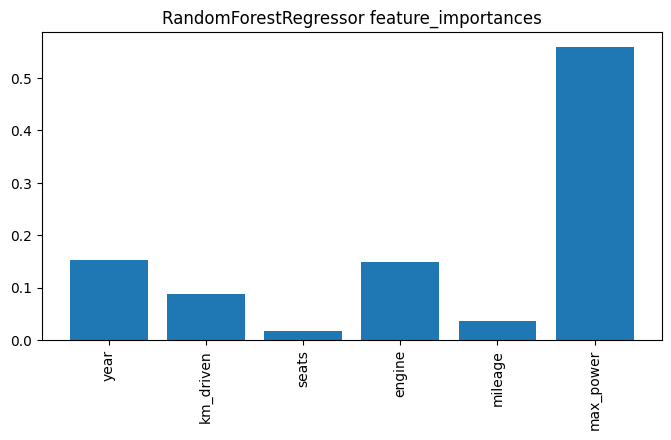

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(Xtest.columns, best_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('RandomForestRegressor feature_importances')

In [14]:
lr_imp_list = list(zip(lr.feature_names_in_, lr.coef_))
lr_imp_list.sort(key=lambda x: x[1], reverse=True)
lr_imp_list

[('year', 42746.615852289746),
 ('max_power', 15857.405274916688),
 ('mileage', 9733.878917782042),
 ('engine', 116.99386890464058),
 ('km_driven', -1.3140587237998016),
 ('seats', -78269.31353603202)]

Text(0.5, 1.0, 'LinearRegression веса')

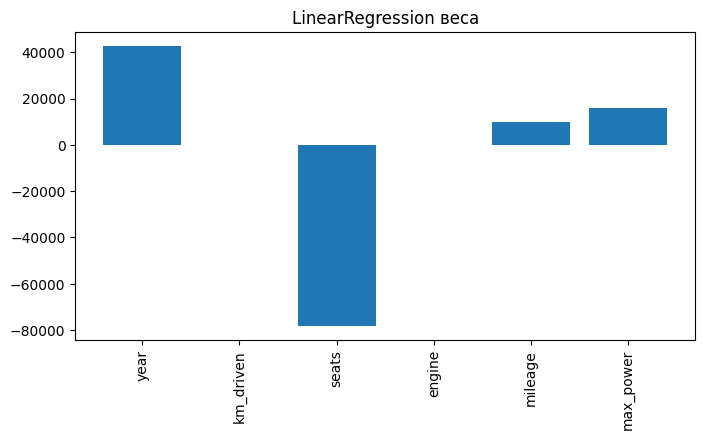

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(Xtrain.columns, lr.coef_)
plt.xticks(rotation=90)
plt.title('LinearRegression веса')

### Выводы

1. В данной задаче, при обучении с параметрами по умолчанию, лучше показала себя модель RandomForestRegressor r2 = 0.96, чем LinearRegression r2 = 0.65
2. С помощью подбора гиперпараметров не удалось получить увеличение метрики r2. С параметрами по умолчанию r2 = 0.96, после подбора гиперпараметров r2 = 0.96.
   Но учитывыя, что она и так была хорошая, это нормально.
3. Распределение признаков по важности у RandomForestRegressor выглядит вполне логично. Цена больше всего зависит от max_power, year и engine.
   Есть частичное совпадение признаков по важности с линейной регрессией, это max_power, year. Признак seats у линейной регрессии имеет большой коэффициент, что достачно странно.
4. Так же в данной работе не использовалась нормализация признаков, но не смотря на это модель RandomForestRegressor показала хороший результат на тестовой выборке.